<a href="https://colab.research.google.com/github/aayushabhatia/Data-Science-and-Business-Intelligence/blob/main/DecisionTree_KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. decision tree
2. k means clustering algorithm

Model Accuracy: 1.00


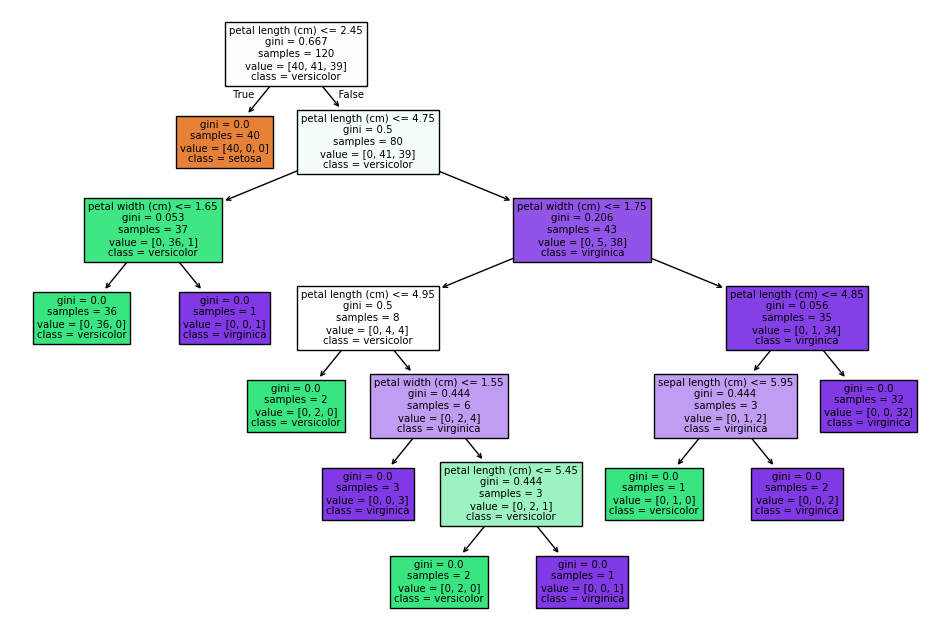

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris

# Gini Index Formula:
# Gini = 1 - Σ (p_i)^2
# where p_i is the probability of each class in a node.

# load dataset
iris = load_iris()
X = iris.data
y = iris.target

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create decision tree classifier using Gini impurity
clf = DecisionTreeClassifier(criterion="gini")  # Default is "gini", explicitly mentioned
clf.fit(X_train, y_train)

# make predictions on test set
y_pred = clf.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# visualize decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


K means clustering algo

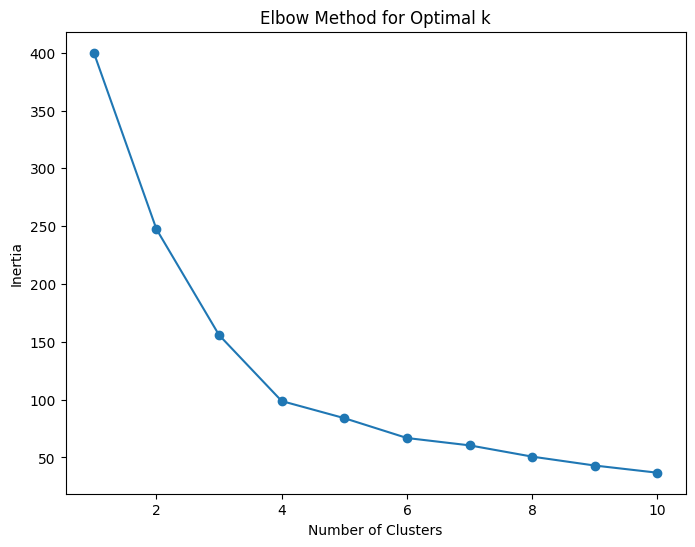

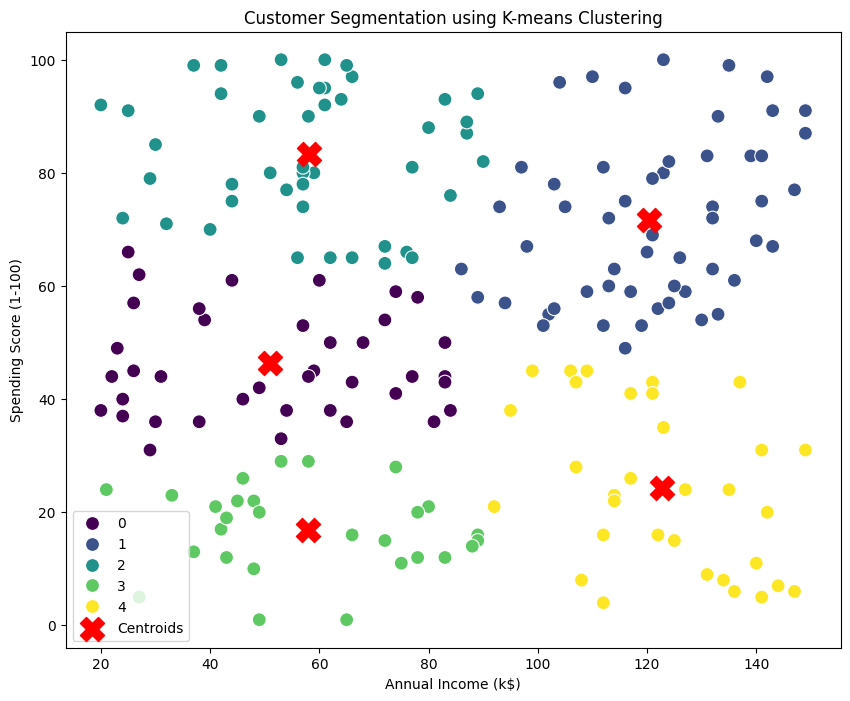

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

data = {
    "CustomerID": range(1,201),
    "Annual Income (k$)": np.random.randint(20, 150, size=200),
    "Spending Score (1-100)": np.random.randint(1, 101, size=200)
}
df = pd.DataFrame(data)

# select relevant features ( annual income and spending score )
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine optimal clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# apply k means with chosen no of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# scatter plots of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)

 # mark centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-means Clustering')
# plt.scatter(centroid[:,0] * scaler_scale_[0] + scaler_mean_[0])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

implement the k means clustering on a banking customer dataset